In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings #to avoid memory leak warning in jupyter
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

import pandas as pd
#Classification
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score
from sklearn.metrics import recall_score, precision_recall_curve, average_precision_score

df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#drop SkinThickness column because it will not be familiar for the user
df = df.drop('SkinThickness',axis=1)

In [5]:
#function to change diabetes pedigree function into true or false, true if >= 0.471876, for easier understanding
def diabeticfamily(value):
    if value >= 0.471876:
        return 1
    else:
        return 0 

In [6]:
df['familydiabetic'] = df['DiabetesPedigreeFunction'].map(diabeticfamily)

In [7]:
def BMI_AGE(df):
    df['BMI_Age'] = df['BMI']/df['Age']
    return df

df = BMI_AGE(df)

In [8]:
df = df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'familydiabetic', 'Age', 'BMI_Age', 'Outcome']]

In [9]:
df = df.drop('DiabetesPedigreeFunction',axis=1)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,familydiabetic,Age,BMI_Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.384115,33.240885,1.059276,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.486702,11.760232,0.395840,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.000000,24.000000,0.795520,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.000000,29.000000,1.036603,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,1.000000,41.000000,1.316667,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,1.000000,81.000000,2.604545,1.000000


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,familydiabetic,Age,BMI_Age,Outcome
0,6,148,72,0,33.6,1,50,0.672000,1
1,1,85,66,0,26.6,0,31,0.858065,0
2,8,183,64,0,23.3,1,32,0.728125,1
3,1,89,66,94,28.1,0,21,1.338095,0
4,0,137,40,168,43.1,1,33,1.306061,1


In [12]:
#drop for any duplicate record
df = df.drop_duplicates()
df.shape

(768, 9)

In [13]:
#Checking number of non-diabetic and diabetic
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
#Checking Null values

df.isnull()
df.isnull().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
Insulin           0
BMI               0
familydiabetic    0
Age               0
BMI_Age           0
Outcome           0
dtype: int64

In [15]:
#Checking the number of zero values in the min 0 columns above.

#creating a df with respective columns only
dataset_0columns = df.iloc[:,[0,1,2,3,4,5,6,7]]


for i in dataset_0columns.columns:
    print('No. of zero values in ' + i + ' is', dataset_0columns[dataset_0columns[i]==0].shape[0])

No. of zero values in Pregnancies is 111
No. of zero values in Glucose is 5
No. of zero values in BloodPressure is 35
No. of zero values in Insulin is 374
No. of zero values in BMI is 11
No. of zero values in familydiabetic is 473
No. of zero values in Age is 0
No. of zero values in BMI_Age is 11


In [16]:
#We will replace the 0 values in respective columns with the mean. Only for Glucose, BloodPressure, SkinThickness, Insulin, and, BMI
for i in df.iloc[:,[1,2,3,4]]:
    df[i]=df[i].replace(0,df[i].mean())
    
#We have replaced the 0 values with the mean in the respective columns.

df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,familydiabetic,Age,BMI_Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,118.660163,32.450805,0.384115,33.240885,1.059276,0.348958
std,3.369578,30.436016,12.115932,93.080358,6.875374,0.486702,11.760232,0.395840,0.476951
min,0.000000,44.000000,24.000000,14.000000,18.200000,0.000000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,79.799479,27.500000,0.000000,24.000000,0.795520,0.000000
50%,3.000000,117.000000,72.000000,79.799479,32.000000,0.000000,29.000000,1.036603,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,1.000000,41.000000,1.316667,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,1.000000,81.000000,2.604545,1.000000


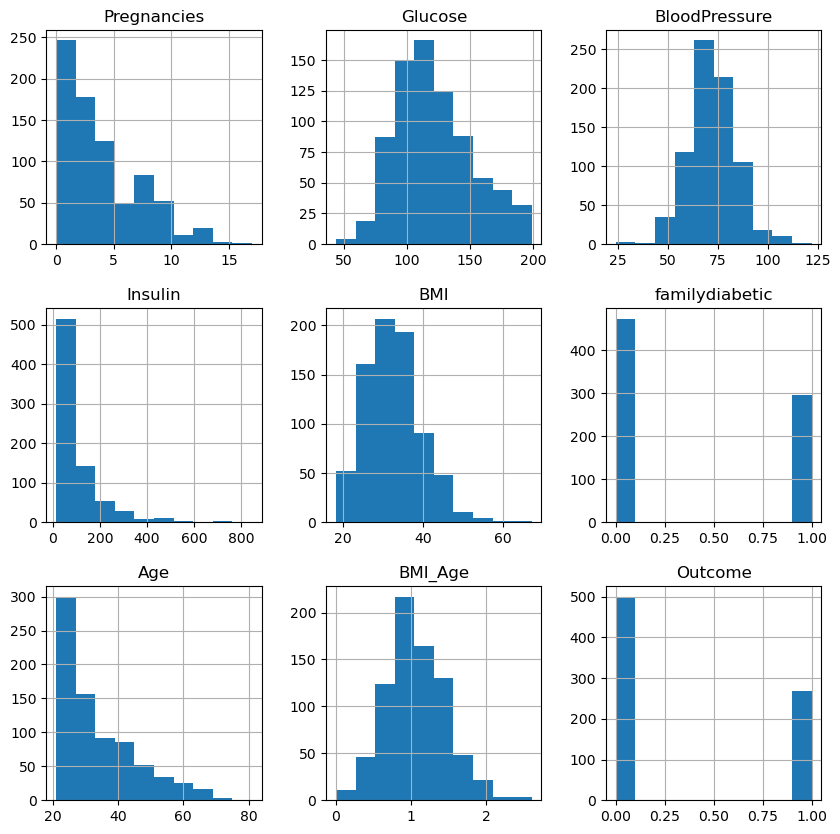

In [17]:
histogram = df.hist(bins=10,figsize=(10,10))

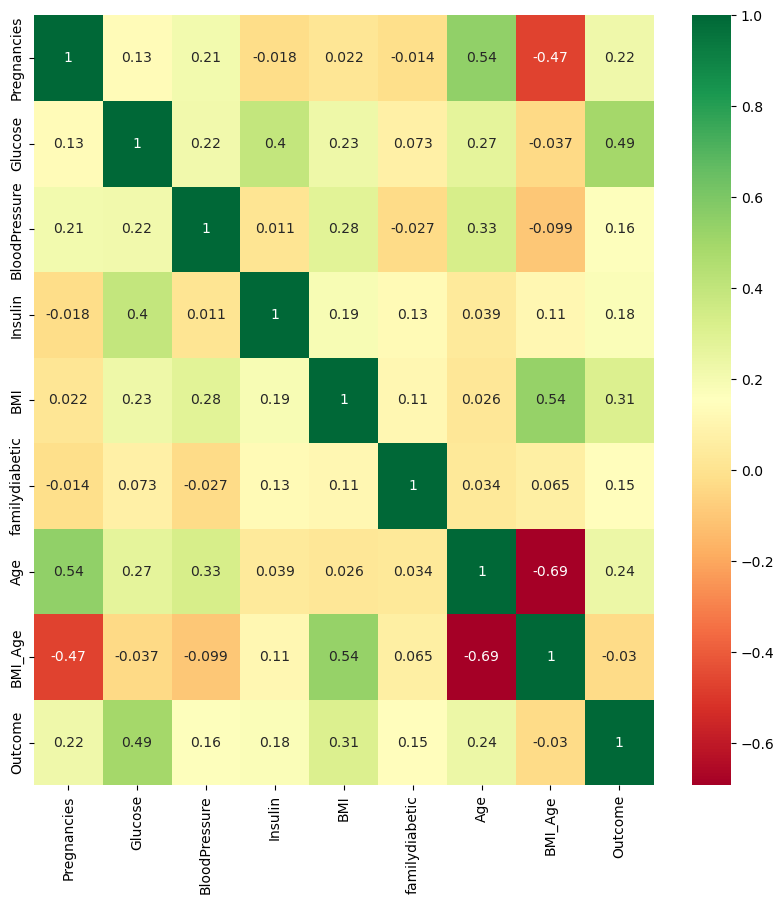

In [18]:
corr = df.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [19]:
#splitting the dataset into predictor and target variables.

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,familydiabetic,Age,BMI_Age
0,6,148.0,72.0,79.799479,33.6,1,50,0.672000
1,1,85.0,66.0,79.799479,26.6,0,31,0.858065
2,8,183.0,64.0,79.799479,23.3,1,32,0.728125
3,1,89.0,66.0,94.000000,28.1,0,21,1.338095
4,0,137.0,40.0,168.000000,43.1,1,33,1.306061
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,180.000000,32.9,0,63,0.522222
764,2,122.0,70.0,79.799479,36.8,0,27,1.362963
765,5,121.0,72.0,112.000000,26.2,0,30,0.873333
766,1,126.0,60.0,79.799479,30.1,0,47,0.640426


In [20]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
#applying scaling 

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Y = scaler.fit_transform((Y.values).reshape(-1,1))
#We will not scale our target variable as we want to keep the values to 0 and 1.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, stratify=Y,random_state=42)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [23]:
#Applying SMOTE to balance the ratio of dataset outcome

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print("Before SMOTE:", Y_train.value_counts())
print("After SMOTE:", Y_train_resampled.value_counts())

X_train = X_train_resampled
Y_train = Y_train_resampled

Before SMOTE: Outcome
0    350
1    187
Name: count, dtype: int64
After SMOTE: Outcome
1    350
0    350
Name: count, dtype: int64


In [24]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance in the original data
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
#can be seen that 1 column is missing after implement PCA

((700, 7), (700,), (231, 7), (231,))

In [25]:
#Random Forest 

rf = RandomForestClassifier(random_state=69)
rf_model = rf.fit(X_train,Y_train)

In [26]:
#Logistic Regression

logr = LogisticRegression(random_state=69)
logr_model = logr.fit(X_train,Y_train)

In [27]:
#Support Vector Machine 

svm = SVC(probability=True,random_state=69)
svm_model = svm.fit(X_train,Y_train)

In [28]:
#K-Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(X_train,Y_train)

In [29]:
#Neural Network with MLP (Multi-Layer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(16, 8),   # 2 hidden layers: 16 neurons, 8 neurons
                    activation='relu',            # ReLU activation
                    solver='adam',                # optimizer
                    max_iter=500,                 # training iterations
                    random_state=69)

mlp_model = mlp.fit(X_train, Y_train)

In [30]:
#Doing the prediction for X_test using the respective models

rf_pred = rf_model.predict(X_test)

logr_pred = logr_model.predict(X_test)

svm_pred = svm_model.predict(X_test)

knn_pred = knn_model.predict(X_test)

mlp_pred = mlp.predict(X_test)

In [31]:
classifiers = [rf,logr,svm,knn,mlp]
models = [rf_model,logr_model,svm_model,knn_model,mlp_model]
preds = [rf_pred,logr_pred,svm_pred,knn_pred,mlp_pred]
model_names =["Random Forest", "Logistic Regression", "Support Vector Machine",
              "K-Nearest Neighbor", "NN Multi-Layer Perceptron"]

In [32]:
for (i , j ,h) in zip(model_names,classifiers,preds):
    print("Train Accuracy of" ,i , round(j.score(X_train,Y_train)*100,2))
    print("Test Accuracy of" ,i , round(j.score(X_test,Y_test)*100,2))
    print("Accuracy Score of" ,i , round(accuracy_score(Y_test,h)*100,2))
    print("-------------------------------------------------")

Train Accuracy of Random Forest 100.0
Test Accuracy of Random Forest 76.19
Accuracy Score of Random Forest 76.19
-------------------------------------------------
Train Accuracy of Logistic Regression 75.57
Test Accuracy of Logistic Regression 73.16
Accuracy Score of Logistic Regression 73.16
-------------------------------------------------
Train Accuracy of Support Vector Machine 84.29
Test Accuracy of Support Vector Machine 78.35
Accuracy Score of Support Vector Machine 78.35
-------------------------------------------------
Train Accuracy of K-Nearest Neighbor 100.0
Test Accuracy of K-Nearest Neighbor 74.03
Accuracy Score of K-Nearest Neighbor 74.03
-------------------------------------------------
Train Accuracy of NN Multi-Layer Perceptron 86.71
Test Accuracy of NN Multi-Layer Perceptron 75.32
Accuracy Score of NN Multi-Layer Perceptron 75.32
-------------------------------------------------


In [33]:
for (i , j ) in zip(model_names,preds):
    print(f"Precision Score of {i} is {round(precision_score(Y_test,j)*100,2)}")
    print("-----------------------------------------------------------")

    #Since we are using binary class, we do not have to evaluate the micro average precision, 
    #macro average precision , weighted average precision and precision score on non weighted"

Precision Score of Random Forest is 65.48
-----------------------------------------------------------
Precision Score of Logistic Regression is 60.92
-----------------------------------------------------------
Precision Score of Support Vector Machine is 67.03
-----------------------------------------------------------
Precision Score of K-Nearest Neighbor is 62.96
-----------------------------------------------------------
Precision Score of NN Multi-Layer Perceptron is 63.64
-----------------------------------------------------------


In [34]:
for (i , j ) in zip(model_names,preds):
    print(f"Classification report of {i}  \n{classification_report(Y_test,j,digits=3)}")
    print("------------------------------------------------------------------------")

Classification report of Random Forest  
              precision    recall  f1-score   support

           0      0.823     0.807     0.815       150
           1      0.655     0.679     0.667        81

    accuracy                          0.762       231
   macro avg      0.739     0.743     0.741       231
weighted avg      0.764     0.762     0.763       231

------------------------------------------------------------------------
Classification report of Logistic Regression  
              precision    recall  f1-score   support

           0      0.806     0.773     0.789       150
           1      0.609     0.654     0.631        81

    accuracy                          0.732       231
   macro avg      0.707     0.714     0.710       231
weighted avg      0.737     0.732     0.734       231

------------------------------------------------------------------------
Classification report of Support Vector Machine  
              precision    recall  f1-score   support

       

In [52]:
for (i, j, h, k) in zip(model_names,models,preds,classifiers):
    print(i)
    thresholds = 0.5
    Y_pred_proba = j.predict_proba(X_test)[:, 1]
    Y_pred = (Y_pred_proba >= thresholds).astype(int)
    cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=69)
    cv_score = cross_val_score(k, X, Y, cv=cv, scoring='roc_auc').mean()
    f1_result = f1_score(Y_test, Y_pred)
    accuracy_result = accuracy_score(Y_test, Y_pred)
    recall_result = recall_score(Y_test, Y_pred)
    precision_result = precision_score(Y_test, Y_pred)

    if (i == "Logistic Regression"):
        final_f1_result = f1_result
        final_accuracy_result = accuracy_result
        final_recall_result = recall_result
        final_precision_result = precision_result
        final_cv_score = cv_score

    print(f"F1 Score: {f1_result:.4f}")
    print(f"Accuracy Score: {accuracy_result:.4f}")
    print(f"Recall Score: {recall_result:.4f}")
    print(f"Precision Score: {precision_result:.4f}")
    print(f"ROC AUC Score: {cv_score:.4f}")
    print("-------------------------------------------------\n")

Random Forest
F1 Score: 0.6667
Accuracy Score: 0.7576
Recall Score: 0.6914
Precision Score: 0.6437
ROC AUC Score: 0.8247
-------------------------------------------------

Logistic Regression
F1 Score: 0.6310
Accuracy Score: 0.7316
Recall Score: 0.6543
Precision Score: 0.6092
ROC AUC Score: 0.8422
-------------------------------------------------

Support Vector Machine
F1 Score: 0.6905
Accuracy Score: 0.7749
Recall Score: 0.7160
Precision Score: 0.6667
ROC AUC Score: 0.8306
-------------------------------------------------

K-Nearest Neighbor
F1 Score: 0.6296
Accuracy Score: 0.7403
Recall Score: 0.6296
Precision Score: 0.6296
ROC AUC Score: 0.6776
-------------------------------------------------

NN Multi-Layer Perceptron
F1 Score: 0.6627
Accuracy Score: 0.7532
Recall Score: 0.6914
Precision Score: 0.6364
ROC AUC Score: 0.8338
-------------------------------------------------

0.6309523809523809 0.7316017316017316 0.654320987654321 0.6091954022988506 0.8422166317260658


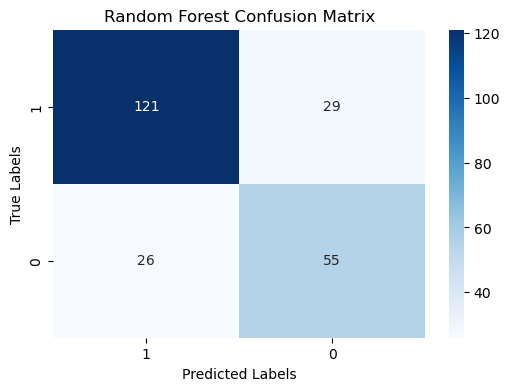

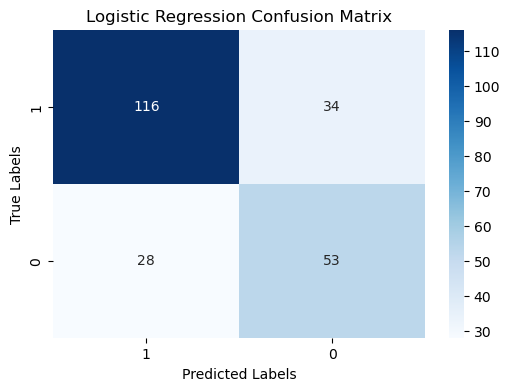

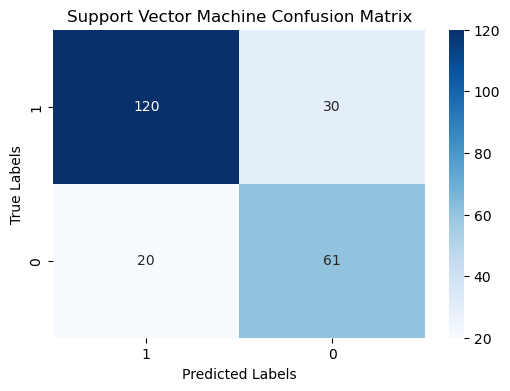

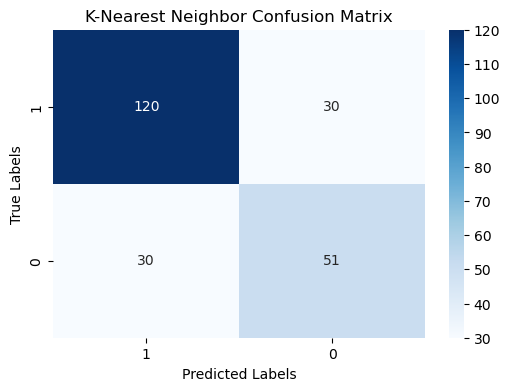

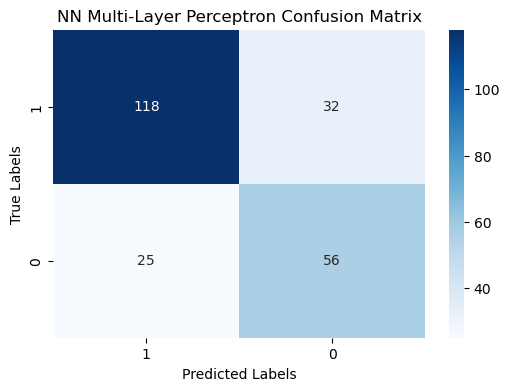

In [36]:
name_models = {
    'Random Forest': rf_model,
    'Logistic Regression': logr_model,
    'Support Vector Machine': svm_model,
    'K-Nearest Neighbor': knn_model,
    'NN Multi-Layer Perceptron': mlp_model
}

# Function to plot confusion matrix for each model using seaborn
def plot_confusion_matrices(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '0'], yticklabels=['1', '0'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'{name} Confusion Matrix')
        plt.show()

# Call the function to plot confusion matrices using seaborn
plot_confusion_matrices(name_models, X_test, Y_test)

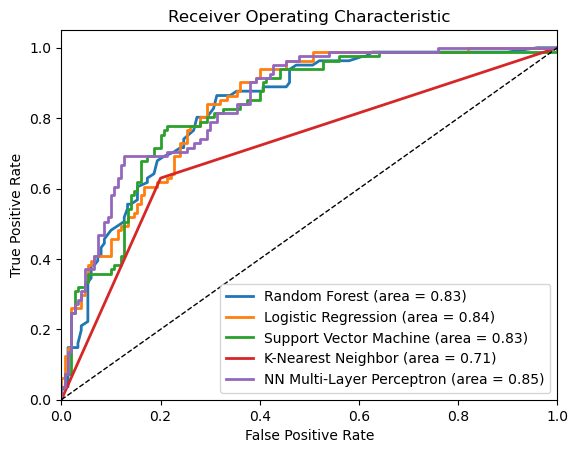

In [37]:
# Function to plot ROC curve for each model
def plot_roc_curves(models, X_test, Y_test):
    plt.figure()
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to plot ROC curves
plot_roc_curves(name_models, X_test, Y_test)

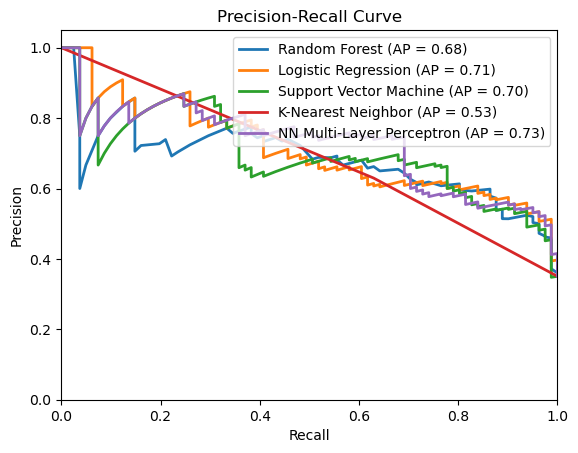

In [38]:
def plot_precision_recall_curves(models, X_test, Y_test):
    plt.figure()
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(Y_test, y_pred_proba)
        average_precision = average_precision_score(Y_test, y_pred_proba)
        plt.plot(recall, precision, lw=2, label=f'{name} (AP = {average_precision:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()
    
plot_precision_recall_curves(name_models, X_test, Y_test)

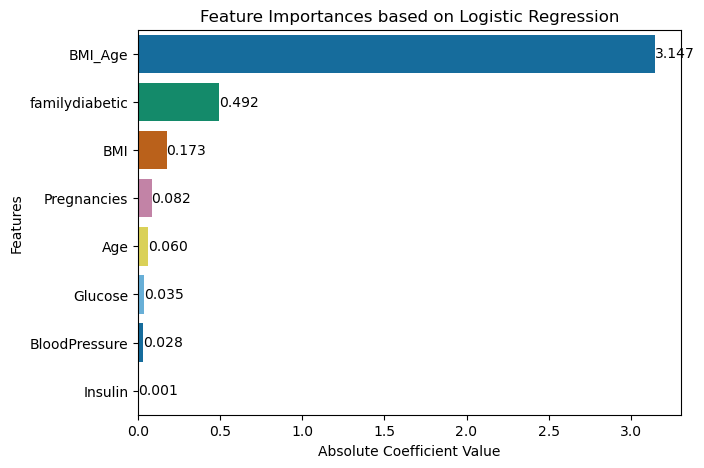

In [39]:
X_original = df.iloc[:,:-1]

# Train logistic regression on the original features
logr_original = LogisticRegression(random_state=69)
logr_original.fit(X_original, Y)

# Get the coefficients
coefficients_original = pd.Series(logr_original.coef_[0], index=X_original.columns)
abs_coefficients_original = coefficients_original.abs().sort_values(ascending=False)

# Set the custom color palette
colors = ["#0072B2", "#009E73", "#D55E00", "#CC79A7", "#F0E442", "#56B4E9"]
palette = sns.color_palette(colors)

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 5))
bar_plot = sns.barplot(x=abs_coefficients_original, y=abs_coefficients_original.index, palette=palette, ax=ax)
ax.set_title('Feature Importances based on Logistic Regression')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Features')

# Add labels to the bars
for p in bar_plot.patches:
    width = p.get_width()
    bar_plot.annotate('{:.3f}'.format(width), (width, p.get_y() + p.get_height() / 2), ha="left", va="center")

# Display the plot
plt.show()

In [40]:
print(logr_original.feature_names_in_)

['Pregnancies' 'Glucose' 'BloodPressure' 'Insulin' 'BMI' 'familydiabetic'
 'Age' 'BMI_Age']


In [41]:
def add_bmi_age_feature(raw_input_data):
    """
    Accepts raw input data list and returns new list with BMI_Age feature.
    
    Parameters:
        raw_input_data (list): [Pregnancies, Glucose, BloodPressure, Insulin, BMI, DiabeticFamily, Age]
    
    Returns:
        list: Original values + BMI_Age
    """
    # unpack values
    Pregnancies, Glucose, BloodPressure, Insulin, BMI, DiabeticFamily, Age = raw_input_data
    
    # calculate new feature
    BMI_Age = BMI / Age
    
    # return new list with BMI_Age appended
    new_list = [Pregnancies, Glucose, BloodPressure, Insulin, BMI, DiabeticFamily, Age, BMI_Age]
    return new_list

In [42]:
#raw_input_data = [Pregnancies, Glucose, BloodPressure, Insulin, BMI, DiabeticFamily, Age]
raw_input_data = (4,90,92,50,37.6,0,30)

input_data = add_bmi_age_feature(raw_input_data)

print(input_data)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_scaled = scaler.transform(input_data_reshaped)

input_data_pca = pca.transform(input_data_scaled)

prediction = logr_model.predict_proba(input_data_pca)[:, 1]

print(f"Risk Score : {prediction[0]*100:.2f}%")

if (prediction[0] <=0.33):
    print("This person has low risk of diabetes.")
elif (prediction[0] <=0.66):
    print("This person has medium risk of diabetes.")
else:
    print("This person is high risk of diabetes.")

[4, 90, 92, 50, 37.6, 0, 30, 1.2533333333333334]
Risk Score : 20.30%
This person has low risk of diabetes.


In [56]:
import joblib

In [57]:
joblib.dump(scaler, "scaler.pkl") #the standard scaler
joblib.dump(pca, "pca.pkl") #the pca
joblib.dump(logr_model, "trained_model.pkl") #the model

['trained_model.pkl']

In [60]:
#loading the saved model
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca.pkl")
loaded_model = joblib.load("trained_model.pkl")

In [61]:
#raw_input_data = [Pregnancies, Glucose, BloodPressure, Insulin, BMI, DiabeticFamily, Age]

raw_input_data = (8,125,64,10,23.3,1,54)

input_data = add_bmi_age_feature(raw_input_data)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_scaled = scaler.transform(input_data_reshaped)
input_data_pca = pca.transform(input_data_scaled)

prediction = loaded_model.predict_proba(input_data_pca)[:, 1]

print(f"Risk Score : {prediction[0]*100:.2f}%")

if (prediction[0] <=0.33):
    print("This person has low risk of diabetes.")
elif (prediction[0] <=0.66):
    print("This person has medium risk of diabetes.")
else:
    print("This person is high risk of diabetes.")

Risk Score : 59.89%
This person has medium risk of diabetes.


In [55]:
print(final_f1_result, final_accuracy_result, final_recall_result, final_precision_result, final_cv_score,)
print(f"F1 Score: {final_f1_result:.4f}")
print(f"Accuracy Score: {final_accuracy_result:.4f}")
print(f"Recall Score: {final_recall_result:.4f}")
print(f"Precision Score: {final_precision_result:.4f}")
print(f"ROC AUC Score: {final_cv_score:.4f}")

0.6309523809523809 0.7316017316017316 0.654320987654321 0.6091954022988506 0.8422166317260658
F1 Score: 0.6310
Accuracy Score: 0.7316
Recall Score: 0.6543
Precision Score: 0.6092
ROC AUC Score: 0.8422
-------------------------------------------------

